## Applying Functions to Dataframes with Pandas

The data we're playing with today looks at the annual rates of alcohol consumption (measured in grams) across all nations. The dataset comes from the [Global Health Data Exchange](http://ghdx.healthdata.org/gbd-2016), which has a ton of interesting datasets.

First, we'll take a quick look to see what the dataset contains, as well as what it doesn't contain.

### Import numpy, pandas, matplotlib, and seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Open CSV file, check out the head, info

In [2]:
alcohol = pd.read_csv('alcohol_grams.CSV')

In [3]:
alcohol.head()

,measure,location_id,location_name,sex_id,sex_name,age_group_id,age_group_name,year_id,metric,mean,lower,upper
0,Standard drinks daily (grams per day),1,Global,2,Female,8,15 to 19,1990,Number,5.551403,3.834849,7.666409
1,Standard drinks daily (grams per day),1,Global,2,Female,9,20 to 24,1990,Number,8.828895,6.432570,11.782382
2,Standard drinks daily (grams per day),1,Global,2,Female,10,25 to 29,1990,Number,10.158885,7.665817,13.180191
3,Standard drinks daily (grams per day),1,Global,2,Female,11,30 to 34,1990,Number,11.336363,8.373506,14.601196
4,Standard drinks daily (grams per day),1,Global,2,Female,12,35 to 39,1990,Number,11.891846,9.011544,15.458667


In [4]:
alcohol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45804 entries, 0 to 45803
Data columns (total 12 columns):
measure           45804 non-null object
location_id       45804 non-null int64
location_name     45804 non-null object
sex_id            45804 non-null int64
sex_name          45804 non-null object
age_group_id      45804 non-null int64
age_group_name    45804 non-null object
year_id           45804 non-null int64
metric            45804 non-null object
mean              45804 non-null float64
lower             45804 non-null float64
upper             45804 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.2+ MB


## The Data

This data measures average grams of alcohol per day, giving the mean as well as the standard deviation (the high and low). Measurements are sorted by country, gender, age group, and year of measurement. There are no missing values.

Besides the names of the locations, sexes, and age groups, this dataset also gives their internal IDs. Because we don't have a reference telling us what each ID represents, they aren't much use to us. We can remove these columns.

What about some of the other columns, like "measure" and "metric"? Are there multiple responses in these columns, or are they all identical?

In [5]:
alcohol['measure'].unique()

array(['Standard drinks daily (grams per day)'], dtype=object)

In [6]:
alcohol['metric'].unique()

array(['Number'], dtype=object)

These columns tells us that this dataset is only measuring one thing, and that measurement is presented numerically throughout. We can get rid of these columns as well.

### Remove unwanted columns

Can do this with `.drop()`, performing it inplace.

In [7]:
alcohol.drop(['measure','location_id','sex_id','age_group_id','metric'],axis=1,inplace=True)

In [8]:
alcohol.head()

,location_name,sex_name,age_group_name,year_id,mean,lower,upper
0,Global,Female,15 to 19,1990,5.551403,3.834849,7.666409
1,Global,Female,20 to 24,1990,8.828895,6.432570,11.782382
2,Global,Female,25 to 29,1990,10.158885,7.665817,13.180191
3,Global,Female,30 to 34,1990,11.336363,8.373506,14.601196
4,Global,Female,35 to 39,1990,11.891846,9.011544,15.458667


That's much nicer!

### Column values

What countries are in this dataset? Which age groups? Are measurements for both sexes individually as well as combined? 

In [9]:
# Which countries? Which combinations of countries?

alcohol['location_name'].unique()

array(['Global', 'China', 'North Korea', 'Taiwan', 'Cambodia',
       'Indonesia', 'Laos', 'Malaysia', 'Maldives', 'Myanmar',
       'Philippines', 'Sri Lanka', 'Thailand', 'Timor-Leste', 'Vietnam',
       'Fiji', 'Kiribati', 'Marshall Islands',
       'Federated States of Micronesia', 'Papua New Guinea', 'Samoa',
       'Solomon Islands', 'Tonga', 'Vanuatu', 'Armenia', 'Azerbaijan',
       'Georgia', 'Kazakhstan', 'Kyrgyzstan', 'Mongolia', 'Tajikistan',
       'Turkmenistan', 'Uzbekistan', 'Albania', 'Bosnia and Herzegovina',
       'Bulgaria', 'Croatia', 'Czech Republic', 'Hungary', 'Macedonia',
       'Montenegro', 'Poland', 'Romania', 'Serbia', 'Slovakia',
       'Slovenia', 'Belarus', 'Estonia', 'Latvia', 'Lithuania', 'Moldova',
       'Russian Federation', 'Ukraine', 'Brunei', 'Japan', 'South Korea',
       'Singapore', 'Australia', 'New Zealand', 'Andorra', 'Austria',
       'Belgium', 'Cyprus', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Iceland', 'Ireland', 'I

In [10]:
alcohol['location_name'].nunique()

201

201 countries and combinations being measured! Since there are only 195 countries, this must include some country combinations. We know from looking at the head of the dataset that **Global** is one of the values, and looking at the bottom of the list we can see that there are five socio-demographic index (SDI) classifications, from low SDI to high SDI.

What about sex and age group?

In [11]:
alcohol['sex_name'].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
alcohol['age_group_name'].unique()

array(['15 to 19', '20 to 24', '25 to 29', '30 to 34', '35 to 39',
       '40 to 44', '45 to 49', '50 to 54', '55 to 59', '60 to 64',
       '65 to 69', '70 to 74', '75 to 79', '80 to 84', '85 to 89',
       '90 to 94', '95 plus', 'Age-standardized', 'All Ages'],
      dtype=object)

This data splits all measurements by sex, and does not have any combined measurement. It does, however, have individual age groups, a measurement for all ages combined, and a measurement that is age-standardized, which takes into account a particular country or countries' age distribution.

## Feature Engineering

The dataset has measurements by age, sex, and country. What is the dataset missing that would aid in later analysis?

Right now, the dataset is useful in analysing single countries and how alcohol rates differ across ages and between sexes. We could even compare alcohol-use rates across different SDI levels (although the data does not say outright which countries belong to which category).

But what if we wanted to compare a select group of countries? There are a few options here:
1. Re-index the dataset by `location_name` and use the `loc()` method to display only a few select countries. We can save this output as a new dataset.
2. Create a function that notes whether a particular row of the dataset pertains to one of these select countries. Instead of creating a new dataset, this function will just add a new column to the old dataset.

Using the index to select specific rows is very useful, but for this particular case I prefer writing a function. This adds more information to the original dataset that we might be able to use later.

### Creating a function

Let's say I've decided that I just want to look at the alcohol consumption in OECD countries. This means I need a quick way of determining which rows of data are for countries in the OECD.

I found a list of OECD countries [here](https://www.oecdwatch.org/oecd-guidelines/oecd). I edited the list a little so that the country names reflected those in my dataset (eg, changing "Slovak Republic" to Slovakia) and then I turned that list into a variable.

In [13]:
OECD_list = "Australia, Austria, Belgium, Canada, Chile, Czech Republic, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Iceland, Ireland, Israel, Italy, Japan, South Korea, Luxembourg, Mexico, Netherlands, New Zealand, Norway, Poland, Portugal, Slovakia, Slovenia, Spain, Sweden, Switzerland, Turkey, United Kingdom, United States".split(', ') 

In [14]:
OECD_list

['Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Chile',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'South Korea',
 'Luxembourg',
 'Mexico',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Poland',
 'Portugal',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'United Kingdom',
 'United States']

These are all of the countries in the OECD.

Next, I need a function. The function will take an input (location) and see if it matches one of the countries in this list. To keep it simple, the function will return 1 if it matches, 0 if it does not.

In [15]:
# Compare input to OECD list

def is_OECD(location):
    if location in OECD_list:
        return 1
    else:
        return 0

### Apply function to dataset

Now that we have a function, we can apply it to the location_name column in the original dataset. In order to add its output to the dataset, we will assign it to a new column.

In [16]:
alcohol['OECD'] = alcohol['location_name'].apply(is_OECD)

In [17]:
alcohol.head()

,location_name,sex_name,age_group_name,year_id,mean,lower,upper,OECD
0,Global,Female,15 to 19,1990,5.551403,3.834849,7.666409,0
1,Global,Female,20 to 24,1990,8.828895,6.432570,11.782382,0
2,Global,Female,25 to 29,1990,10.158885,7.665817,13.180191,0
3,Global,Female,30 to 34,1990,11.336363,8.373506,14.601196,0
4,Global,Female,35 to 39,1990,11.891846,9.011544,15.458667,0


Looks like we succeded in creating a new column, and the column is at least filled with zeros. Let's grab data for a country we know is in the OECD, and see what the new column looks like.

In [18]:
alcohol.set_index('location_name').loc['Slovakia'].head()

,sex_name,age_group_name,year_id,mean,lower,upper,OECD
location_name,,,,,,,
Slovakia,Female,15 to 19,1990,22.603887,15.821145,31.485340,1
Slovakia,Female,20 to 24,1990,28.719093,19.538701,39.642603,1
Slovakia,Female,25 to 29,1990,24.183582,16.884298,32.688906,1
Slovakia,Female,30 to 34,1990,23.368553,16.545717,31.487261,1
Slovakia,Female,35 to 39,1990,26.880031,19.073077,36.253166,1


The rows for Slovakia all have their OECD column marked to 1. This means the function worked!

To increase the challenge, and also because it's useful information, let's also create a function that designates each row into a world region, such as North America, Northern Africa, and Southeast Asia.

For this, I'm going to use the [United Nations Geoscheme](https://en.wikipedia.org/wiki/United_Nations_geoscheme). We can quibble about the exact list used - and, indeed, depending on the exact context a different classification system might be better - but for our intents and purposes here, the UN geoscheme will be fine.

How to proceed?
1. Make a dictionary filled with region keys and country values.
    - Also, confirm that the spelling of countries in these lists match the spelling of the countries in the dataset
2. Create general function that compares an inputed country name (from the dataset) to a name on an inputed list. Return 1 for matches.
3. Create a new column for each output.

We'll wind up with a new column for each region. This is much more practical than filling in a single column with multiple string values.

### Create dictionary of world regions

In [19]:
region_dictionary = {
    'e_africa': ['Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 'Madagascar', 
                 'Malawi', 'Mauritius', 'Mayotte', 'Mozambique', 'Réunion', 'Rwanda', 'Seychelles', 
                 'Somalia', 'South Sudan', 'Tanzania', 'Uganda', 'Zambia', 'Zimbabwe'],
    'm_africa': ['Angola', 'Cameroon', 'Central African Republic', 'Chad', 'Democratic Republic of the Congo', 
                 'Equatorial Guinea', 'Gabon', 'Congo', 'Sao Tome and Principe'],
    'n_africa': ['Algeria', 'Egypt', 'Libya', 'Morocco', 'Sudan', 'Tunisia', 'Western Sahara'],
    's_africa': ['Botswana', 'Swaziland', 'Lesotho', 'Namibia', 'South Africa'],
    'w_africa': ['Benin', 'Burkina Faso', 'Cabo Verde', "Cote d'Ivoire", 'THe Gambia', 'Ghana', 
                 'Guinea', 'Guinea-Bissau', 'Liberia', 'Mali', 'Mauritania', 'Niger', 'Nigeria', 
                 'Saint Helena', 'Senegal', 'Sierra Leone', 'Togo'],
    'n_america': ['Bermuda', 'Canada', 'Greenland', 'Saint Pierre and Miquelon', 'United States'],
    's_america': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Falkland Islands', 
                  'French Guiana', 'Guyana', 'Paraguay', 'Peru', 'South Georgia and the South Sandwich Islands', 
                  'Suriname', 'Uruguay', 'Venezuela'],
    'c_america': ['Belize', 'Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Mexico', 'Nicaragua', 
                  'Panama'],
    'car_america': ['Anguilla', 'Antigua and Barbuda', 'Aruba', 'The Bahamas', 'Barbados', 'Bonaire', 
                    'Sint Eustatius and Saba', 'British Virgin Islands', 'Cayman Islands', 'Cuba', 
                    'Curaçao', 'Dominica', 'Dominican Republic', 'Grenada', 'Guadeloupe', 'Haiti', 'Jamaica', 'Martinique', 'Montserrat', 'Puerto Rico', 'Saint Barthélemy', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Martin', 'Saint Vincent and the Grenadines', 'Sint Maarten', 'Trinidad and Tobago', 'Turks and Caicos Islands', 'Virgin Islands, U.S.'],
    'c_asia': ['Kazakhstan', 'Kyrgyzstan', 'Tajikistan', 'Turkmenistan', 'Uzbekistan'],
    'e_asia': ['China', 'Japan', 'Mongolia', 'North Korea', 'South Korea', 'Taiwan'],
    'se_asia': ['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 
                'Singapore', 'Thailand', 'Timor-Leste', 'Vietnam'],
    's_asia': ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Iran', 'Maldives', 'Nepal', 'Pakistan', 
               'Sri Lanka'],
    'w_asia': ['Armenia', 'Azerbaijan', 'Bahrain', 'Cyprus', 'Georgia', 'Iraq', 'Israel', 'Jordan', 
               'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saudi Arabia', 'Palestine', 'Syria', 'Turkey', 
               'United Arab Emirates', 'Yemen'],
    'e_europe': ['Belarus', 'Bulgaria', 'Czech Republic', 'Hungary', 'Moldova', 'Poland', 'Romania', 
                 'Russian Federation', 'Slovakia', 'Ukraine'],
    'n_europe': ['Åland Islands', 'Denmark', 'Estonia', 'Faroe Islands', 'Finland', 'Guernsey', 
                 'Iceland', 'Ireland, Republic of', 'Isle of Man', 'Jersey', 'Latvia', 'Lithuania', 
                 'Norway', 'Sark', 'Svalbard and Jan Mayen', 'Sweden', 'United Kingdom'],
    's_europe': ['Albania', 'Andorra', 'Bosnia and Herzegovina', 'Croatia', 'Gibraltar', 'Greece', 
                 'Italy', 'Malta', 'Montenegro', 'Macedonia', 'Portugal', 'San Marino', 'Serbia', 
                 'Slovenia', 'Spain', 'Vatican City'],
    'w_europe': ['Austria', 'Belgium', 'France', 'Germany', 'Liechtenstein', 'Luxembourg', 'Monaco', 
                 'Netherlands', 'Switzerland'],
    'anz': ['Australia', 'New Zealand'],
    'melanesia': ['Fiji', 'New Caledonia', 'Papua New Guinea', 'Solomon Islands', 'Vanuatu'],
    'micronesia': ['Guam', 'Kiribati', 'Marshall Islands', 'Federated States of Micronesia', 'Nauru',
                   'Northern Mariana Islands', 'Palau'],
    'polynesia': ['American Samoa', 'Cook Islands', 'French Polynesia', 'Niue', 'Pitcairn Islands', 
                  'Samoa', 'Tokelau', 'Tonga', 'Tuvalu', 'Wallis and Futuna']
}

Earlier, I used a function to determine whether a country was in the OECD or not. With the world regions, there's quite a bit more to unpack. Instead of making a variety of variables and lists, I made the whole thing into a dictionary, with regions names as the keys and a list of countries as the values.

All I have to do now is see if any given country is part of a key/value pair, and set these results to individual columns (one for each region). I don't need to make a function for this - all I need is a for loop!

In [20]:
for region in region_dictionary:
    alcohol[region] = alcohol['location_name'].apply(lambda x: int(x in region_dictionary[region]))

In [21]:
alcohol.head()

,location_name,sex_name,age_group_name,year_id,mean,lower,upper,OECD,e_africa,m_africa,...,s_asia,w_asia,e_europe,n_europe,s_europe,w_europe,anz,melanesia,micronesia,polynesia
0,Global,Female,15 to 19,1990,5.551403,3.834849,7.666409,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Global,Female,20 to 24,1990,8.828895,6.432570,11.782382,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Global,Female,25 to 29,1990,10.158885,7.665817,13.180191,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Global,Female,30 to 34,1990,11.336363,8.373506,14.601196,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Global,Female,35 to 39,1990,11.891846,9.011544,15.458667,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And let's double check that the value is 1 occasionally...

In [22]:
alcohol.set_index('location_name').loc['Kenya'].head()

,sex_name,age_group_name,year_id,mean,lower,upper,OECD,e_africa,m_africa,n_africa,...,s_asia,w_asia,e_europe,n_europe,s_europe,w_europe,anz,melanesia,micronesia,polynesia
location_name,,,,,,,,,,,,,,,,,,,,,
Kenya,Female,15 to 19,1990,5.628869,3.125726,9.319476,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Kenya,Female,20 to 24,1990,7.654551,4.280881,12.345659,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Kenya,Female,25 to 29,1990,8.927868,5.110405,13.879102,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Kenya,Female,30 to 34,1990,9.927120,5.818289,15.439877,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Kenya,Female,35 to 39,1990,10.620917,5.910500,16.682593,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Before we move on, we should tidy this data just a bit. Most of these columns hold independent variables, such as year of and age group. It's only the mean, lower, and upper columns that represent the **findings** of the data, the dependent variables. To make the data most presentable, we should move these three columns to the end of the dataframe. 

And since we have lower and upper measurements, we might as well calculate the range/spread of responses by subtracting one from the other.

In [56]:
measurements = alcohol[['mean', 'lower', 'upper']]

alcohol_clean = alcohol.drop(['mean', 'lower', 'upper'], axis=1).join(measurements)

alcohol_clean['range'] = alcohol_clean['upper'] - alcohol_clean['lower']

In [57]:
# Random five rows from the dataframe

alcohol_clean.iloc[2988:2993]

,location_name,sex_name,age_group_name,year_id,OECD,e_africa,m_africa,n_africa,s_africa,w_africa,...,s_europe,w_europe,anz,melanesia,micronesia,polynesia,mean,lower,upper,range
2988,Timor-Leste,Male,40 to 44,1990,0,0,0,0,0,0,...,0,0,0,0,0,0,1.954630,1.061307,3.053944,1.992637
2989,Timor-Leste,Male,45 to 49,1990,0,0,0,0,0,0,...,0,0,0,0,0,0,1.940227,1.002858,3.178480,2.175622
2990,Timor-Leste,Male,50 to 54,1990,0,0,0,0,0,0,...,0,0,0,0,0,0,1.824620,0.936018,3.026965,2.090947
2991,Timor-Leste,Male,55 to 59,1990,0,0,0,0,0,0,...,0,0,0,0,0,0,1.639691,0.788515,2.897134,2.108620
2992,Timor-Leste,Male,60 to 64,1990,0,0,0,0,0,0,...,0,0,0,0,0,0,1.423661,0.668744,2.619889,1.951145


We're finished with the feature engineering. From here, we can use `loc` to display data for particular regions instead of everywhere at once.

In [25]:
alcohol_clean.columns

Index(['location_name', 'sex_name', 'age_group_name', 'year_id', 'OECD',
       'e_africa', 'm_africa', 'n_africa', 's_africa', 'w_africa', 'n_america',
       's_america', 'c_america', 'car_america', 'c_asia', 'e_asia', 'se_asia',
       's_asia', 'w_asia', 'e_europe', 'n_europe', 's_europe', 'w_europe',
       'anz', 'melanesia', 'micronesia', 'polynesia', 'mean', 'lower', 'upper',
       'range'],
      dtype='object')

In [58]:
# Make viewing of the data easier by temporarily removing the unnecessary columns
# View only the data from Northern Africa countries

region_cols = ['OECD','e_africa', 'm_africa', 'n_africa', 's_africa', 'w_africa', 'n_america',
       's_america', 'c_america', 'car_america', 'c_asia', 'e_asia', 'se_asia',
       's_asia', 'w_asia', 'e_europe', 'n_europe', 's_europe', 'w_europe',
       'anz', 'melanesia', 'micronesia', 'polynesia']

alcohol_clean.set_index('n_africa').loc[1].drop(region_cols[:3] + region_cols[4:], axis=1).head()

,location_name,sex_name,age_group_name,year_id,mean,lower,upper,range
n_africa,,,,,,,,
1,Algeria,Female,15 to 19,1990,1.298715,0.372249,3.090848,2.718600
1,Algeria,Female,20 to 24,1990,2.060249,0.646943,4.347672,3.700729
1,Algeria,Female,25 to 29,1990,2.534396,0.760695,5.146756,4.386061
1,Algeria,Female,30 to 34,1990,3.024791,0.998605,5.756230,4.757625
1,Algeria,Female,35 to 39,1990,3.597046,1.153960,6.942410,5.788450


Alternatively, we can set some conditions, and apply them as a mask to the dataframe to view only the data that meets these conditions

In [27]:
# Create dataframe with data from 1990

cond = (alcohol_clean['year_id'] != 1990)

alcohol_1990 = alcohol_clean.mask(cond).dropna().drop(region_cols, axis=1)

In [28]:
alcohol_1990.tail()

,location_name,sex_name,age_group_name,year_id,mean,lower,upper,range
45609,Middle SDI,Male,85 to 89,1990.0,14.846127,8.835012,22.638470,13.803458
45610,Middle SDI,Male,90 to 94,1990.0,14.589475,8.529547,22.934457,14.404910
45611,Middle SDI,Male,95 plus,1990.0,14.901132,7.660465,24.997890,17.337425
45612,Middle SDI,Male,Age-standardized,1990.0,19.337864,13.332584,26.545510,13.212926
45613,Middle SDI,Male,All Ages,1990.0,16.455913,14.290439,18.870335,4.579895


In [29]:
# Create dataframe with data only from Latin America - c_america, s_america, car_america

latin_america = (alcohol_clean['c_america'] != 1) & (alcohol_clean['s_america'] != 1) & (alcohol_clean['car_america'] != 1)

latin_america_df = alcohol_clean.mask(latin_america).dropna().drop(region_cols, axis=1)

In [30]:
latin_america_df.head()

,location_name,sex_name,age_group_name,year_id,mean,lower,upper,range
18456,Argentina,Female,15 to 19,1990.0,39.706206,24.262654,58.019512,33.756858
18457,Argentina,Female,20 to 24,1990.0,56.821255,36.607963,83.298363,46.690399
18458,Argentina,Female,25 to 29,1990.0,60.397412,40.394965,85.664666,45.269701
18459,Argentina,Female,30 to 34,1990.0,58.944944,40.031370,83.272845,43.241475
18460,Argentina,Female,35 to 39,1990.0,53.961737,35.719631,78.464283,42.744652


Now that we've used feature engineering to grab data from certain countries, let's talk about ways to make this data easier to view.

### Pivot Tables

Pivot tables are a thing you can do in Excel, easily extracting or compiling data from a spreadsheet and presenting it for easy viewing. With pandas, it's incredibly easy to do.

Since we just created a dataframe with data only from Latin America, let's create a pivot table that shows us the mean alcohol consumption for each age group in this region. The original dataframe only shows mean consumption by country, not region, but using a pivot table will give us an easily accessible look at the numbers.

In [36]:
latin_america_df.pivot_table(values='mean', index='age_group_name')

,mean
age_group_name,
15 to 19,14.381908
20 to 24,25.657145
25 to 29,29.361653
30 to 34,30.519505
35 to 39,29.820488
40 to 44,29.565765
45 to 49,29.476926
50 to 54,28.745794
55 to 59,27.712645


Although we lose some information - we can't see variations between countries, nor can we see the gender differences - this pivot table presents an easily digestible slice of the data. We can even plot it!

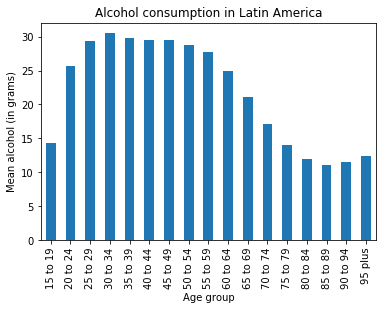

In [44]:
latin_america_df.pivot_table(values='mean', index='age_group_name').drop(['Age-standardized','All Ages']).plot.bar()
plt.title('Alcohol consumption in Latin America')
plt.xlabel('Age group')
plt.ylabel('Mean alcohol (in grams)')
plt.legend().remove()

### Multi-index Hierarchy

Another way to restructure the data and grab specific parts of it is with multi-index hierarchy. By setting multiple index layers, you can use `.xs` (cross-section) to grab small parts.

The key to a good multi-index dataframe is knowing what questions you're trying to answer in advance. That is, if a certain variable (eg, year) is not important for your metrics, you shouldn't put "year_id" in the index. However, if you only wanted to look at data for a certain year, it makes sense to put it in the index.

As an example, let's say that I want to compare drinking rates among women of southern Europe, only for the year 2016. I need to reindex the original dataframe with year, s_europe, gender, and age group as the indices.

In [59]:
alcohol_clean.set_index(['year_id', 's_europe', 'sex_name', 'age_group_name'], inplace=True)

alcohol_clean.head()

location_name  OECD  e_africa  \
year_id s_europe sex_name age_group_name                                 
1990    0        Female   15 to 19              Global     0         0   
                          20 to 24              Global     0         0   
                          25 to 29              Global     0         0   
                          30 to 34              Global     0         0   
                          35 to 39              Global     0         0   

                                          m_africa  n_africa  s_africa  \
year_id s_europe sex_name age_group_name                                 
1990    0        Female   15 to 19               0         0         0   
                          20 to 24               0         0         0   
                          25 to 29               0         0         0   
                          30 to 34               0         0         0   
                          35 to 39               0         0         0   

                                          w_africa  n_america  s_america  \
year_id s_europe sex_name age_group_name                                   
1990    0        Female   15 to 19               0          0          0   
                          20 to 24               0          0          0   
                          25 to 29               0          0          0   
                          30 to 34               0          0          0   
                          35 to 39               0          0          0   

                                          c_america    ...     n_europe  \
year_id s_europe sex_name age_group_name               ...                
1990    0        Female   15 to 19                0    ...            0   
                          20 to 24                0    ...            0   
                          25 to 29                0    ...            0   
                          30 to 34                0    ...            0   
                          35 to 39                0    ...            0   

                                          w_europe  anz  melanesia  \
year_id s_europe sex_name age_group_name                             
1990    0        Female   15 to 19               0    0          0   
                          20 to 24               0    0          0   
                          25 to 29               0    0          0   
                          30 to 34               0    0          0   
                          35 to 39               0    0          0   

                                          micronesia  polynesia       mean  \
year_id s_europe sex_name age_group_name                                     
1990    0        Female   15 to 19                 0          0   5.551403   
                          20 to 24                 0          0   8.828895   
                          25 to 29                 0          0  10.158885   
                          30 to 34                 0          0  11.336363   
                          35 to 39                 0          0  11.891846   

                                             lower      upper     range  
year_id s_europe sex_name age_group_name                                 
1990    0        Female   15 to 19        3.834849   7.666409  3.831559  
                          20 to 24        6.432570  11.782382  5.349811  
                          25 to 29        7.665817  13.180191  5.514374  
                          30 to 34        8.373506  14.601196  6.227690  
                          35 to 39        9.011544  15.458667  6.447123  

[5 rows x 27 columns]

In [62]:
# Create dataframe where year_id=2016, s_europe=1, sex_name='Female', and age_group_name='Age-standardized'

s_europe_women_2016 = alcohol_clean.xs([2016, 1, 'Female', 'Age-standardized']).drop(region_cols[:17] + region_cols[18:], axis=1)

s_europe_women_2016

/Users/natalie/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


location_name       mean  \
year_id s_europe sex_name age_group_name                                        
2016    1        Female   Age-standardized                 Albania  10.908862   
                          Age-standardized  Bosnia and Herzegovina  17.577752   
                          Age-standardized                 Croatia  13.382329   
                          Age-standardized               Macedonia   6.565932   
                          Age-standardized              Montenegro  22.652511   
                          Age-standardized                  Serbia  22.466397   
                          Age-standardized                Slovenia  14.718809   
                          Age-standardized                 Andorra  27.894467   
                          Age-standardized                  Greece  18.019634   
                          Age-standardized                   Italy  17.307251   
                          Age-standardized                Portugal  18.211877   
                          Age-standardized                   Spain  22.801069   

                                                lower      upper      range  
year_id s_europe sex_name age_group_name                                     
2016    1        Female   Age-standardized   7.958405  14.683207   6.724802  
                          Age-standardized  11.846667  25.534925  13.688258  
                          Age-standardized  10.527431  16.743844   6.216414  
                          Age-standardized   4.740120   8.937141   4.197021  
                          Age-standardized  15.917951  31.885312  15.967361  
                          Age-standardized  16.208037  29.699484  13.491447  
                          Age-standardized  11.222428  19.077105   7.854677  
                          Age-standardized  20.091860  37.823726  17.731866  
                          Age-standardized  12.873935  23.591307  10.717372  
                          Age-standardized  12.015132  23.721260  11.706129  
                          Age-standardized  12.778737  25.399792  12.621055  
                          Age-standardized  16.120365  31.091190  14.970826

We can plot this data too!

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

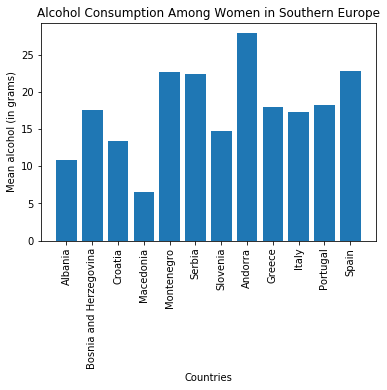

In [78]:
s_europe_women_2016.sort_values('mean')

x = s_europe_women_2016['location_name']
y = s_europe_women_2016['mean']

plt.bar(x,y)
plt.title('Alcohol Consumption Among Women in Southern Europe')
plt.xlabel('Countries')
plt.ylabel('Mean alcohol (in grams)')
plt.xticks(rotation=90)


### Pivot Tables, revisited

Let's say you want to features of the pivot table - you want to take an aggregate look at the data - but you also want to look at individual demographics like you can with the multi-index hierarchy. Pivot tables allow you to create multiple new columns that tease apart the data even more.

Going back to our Latin America dataframe: It's great that we can look at the region's alcohol consumption so quickly, but I'd like to see if there's a difference in consumption between genders. All we have to do is set the 'columns' variable equal to the categorical column in the original dataframe I'd like to explore!

In [89]:
latin_america_df.pivot_table(values='mean', index='age_group_name', columns='sex_name')

sex_name,Female,Male
age_group_name,,
15 to 19,11.123969,17.639848
20 to 24,16.719300,34.594991
25 to 29,17.435008,41.288299
30 to 34,17.246038,43.792973
35 to 39,16.481683,43.159292
40 to 44,16.289294,42.842235
45 to 49,16.564011,42.389842
50 to 54,16.112618,41.378970
55 to 59,15.225349,40.199942


A quick glance at the data suggests that there are significant differences between genders. It'll be even easier to see if we plot it.

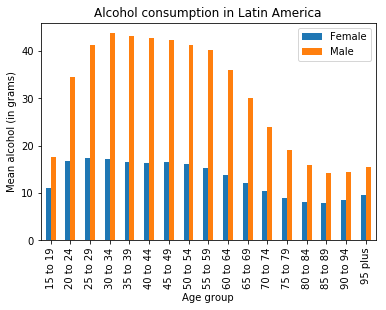

In [90]:
latin_america_df.pivot_table(values='mean', index='age_group_name', columns='sex_name').drop(['Age-standardized','All Ages']).plot.bar()
plt.title('Alcohol consumption in Latin America')
plt.xlabel('Age group')
plt.ylabel('Mean alcohol (in grams)')
plt.legend(title=None)

Whoa, there's a huge difference in consumption between males and females!

### Wrapping Up

That's all for this notebook! I've shown you how to do some feature engineering and add new columns, both with a function and a simple for-loop. I played around with how to structure the dataframe and how to retrieve particular pieces of data, whether the data was already present (as in a multi-index hierarchy) or was aggregated (as in a pivot table). I also showed how you can use matplotlib to very quickly plot your data, giving you a more visual understanding of the numbers.